In [1]:
%load_ext autoreload
%autoreload 2

In [40]:
from causal_nh.granger_causality.granger_causality_graph import *
from causal_nh.utils import open_pkl_file, open_pkl_file_original
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from copy import copy
import seaborn as sns
import os

%matplotlib inline

In [41]:
def plot_and_compare_simulated_adj_matrices(path):
    train, type_size = open_pkl_file_original(path + 'train.pkl', 'train')
    dev, _ = open_pkl_file_original(path + 'dev.pkl', 'dev')
    test, _ = open_pkl_file_original(path + 'test.pkl', 'test')

    with open(path + 'A.pkl', 'rb') as f:
        A = pickle.load(f)

    W_true = copy(A['A'])
    A_true = A['A']
    A_true[A_true>0] = 1


    f, ax = plt.subplots(ncols=2, figsize = (10, 3), dpi = 100)
    ax[0].set_title('A_true')
    ax[1].set_title('W_true')

    sns.heatmap(A_true, ax = ax[0], annot = True)
    sns.heatmap(W_true, ax = ax[1], annot = True)
    plt.show()

    print('ADM4')
    W, A = get_causality_graph(train, test, type_size, 'ADM4')
    f, ax = plt.subplots(ncols=2, figsize = (10, 3), dpi = 100)
    ax[0].set_title('A')
    ax[1].set_title('W')

    sns.heatmap(A, ax = ax[0], annot = True)
    sns.heatmap(W, ax = ax[1], annot = True)
    plt.show()

    print('SumGaussians')
    W, A = get_causality_graph(train, test, type_size, 'SumGaussians')
    f, ax = plt.subplots(ncols=2, figsize = (10, 3), dpi = 100)
    ax[0].set_title('A')
    ax[1].set_title('W')

    sns.heatmap(A, ax = ax[0], annot = True)
    sns.heatmap(W, ax = ax[1], annot = True)
    plt.show()

In [44]:
path_to_data = '../../data/'
datasets = [i for i in os.listdir(path_to_data) if 'synth' in i]

data_synth_5_events_small


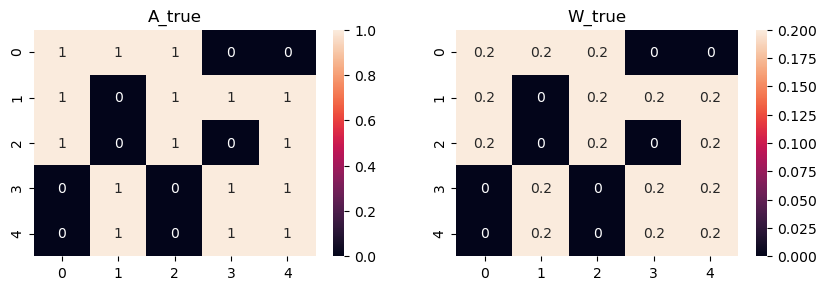

ADM4


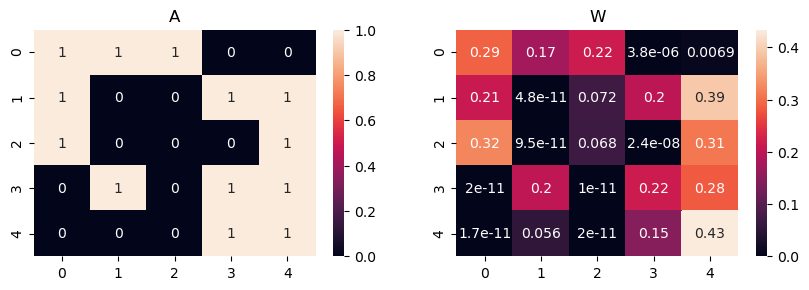

SumGaussians


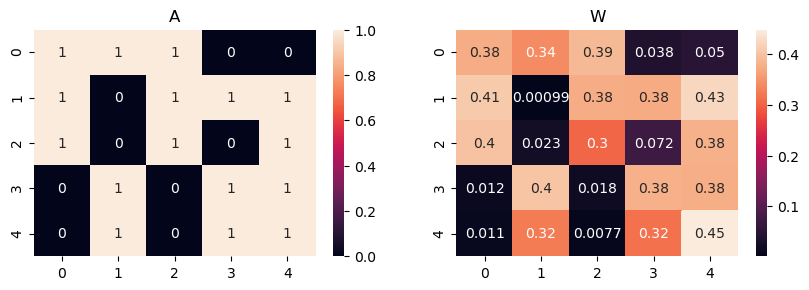

data_synth_2_events_small


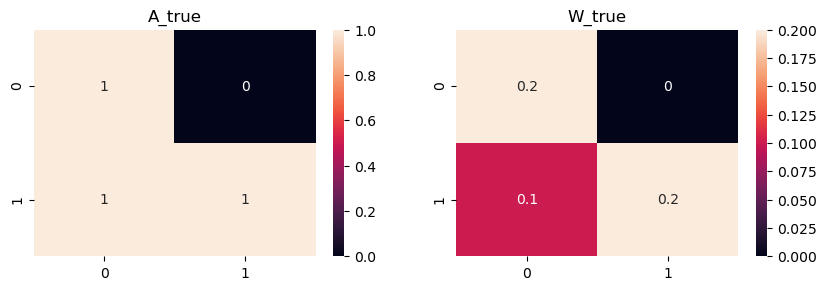

ADM4


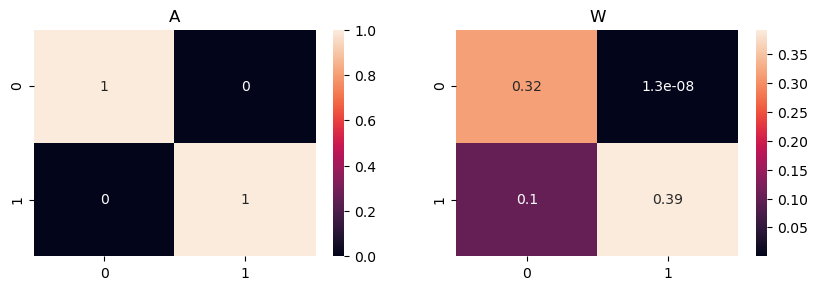

SumGaussians


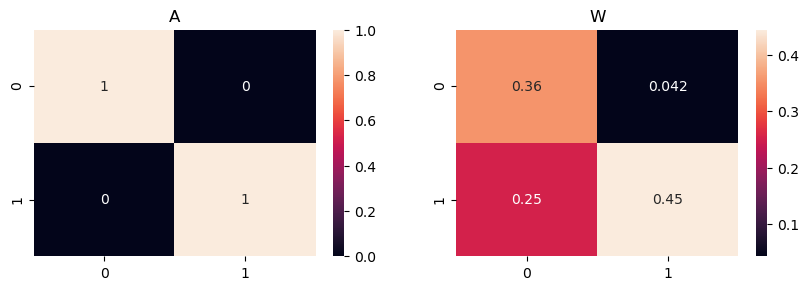

data_synth_3_events_small


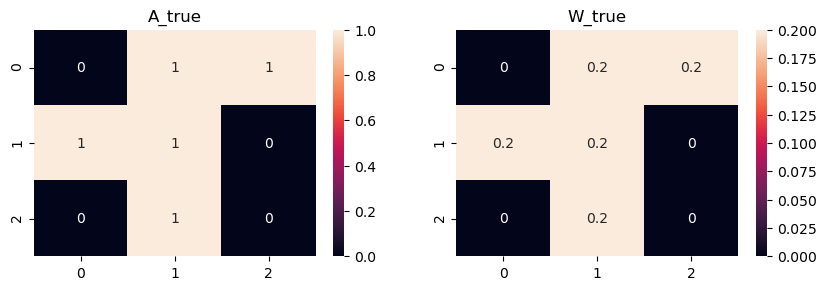

ADM4


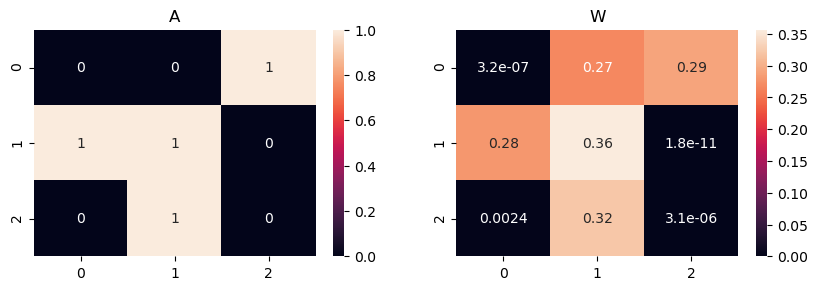

SumGaussians


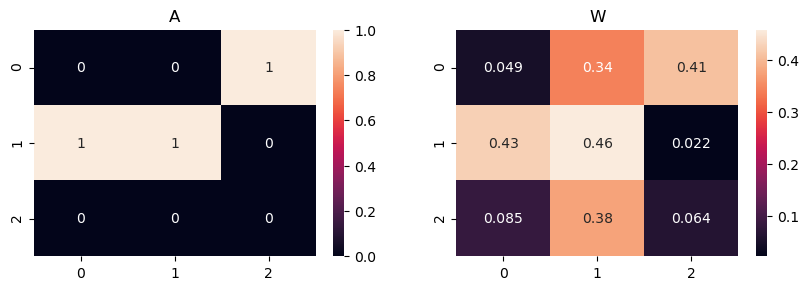

In [46]:
for dataset_name in datasets:
    if '10' not in dataset_name:
        path = f'../../data/{dataset_name}/'
        print(dataset_name)
        plot_and_compare_simulated_adj_matrices(path)